In [1]:
!pip3 install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [4]:
data_train_path =r'C:\Users\hp\Desktop\Image Classification\train'
data_test_path = r'C:\Users\hp\Desktop\Image Classification\test'
data_val_path = r'C:\Users\hp\Desktop\Image Classification\validation'

In [7]:
img_width = 180
img_height =180 

In [8]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [9]:
data_cat = data_train.class_names

In [10]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


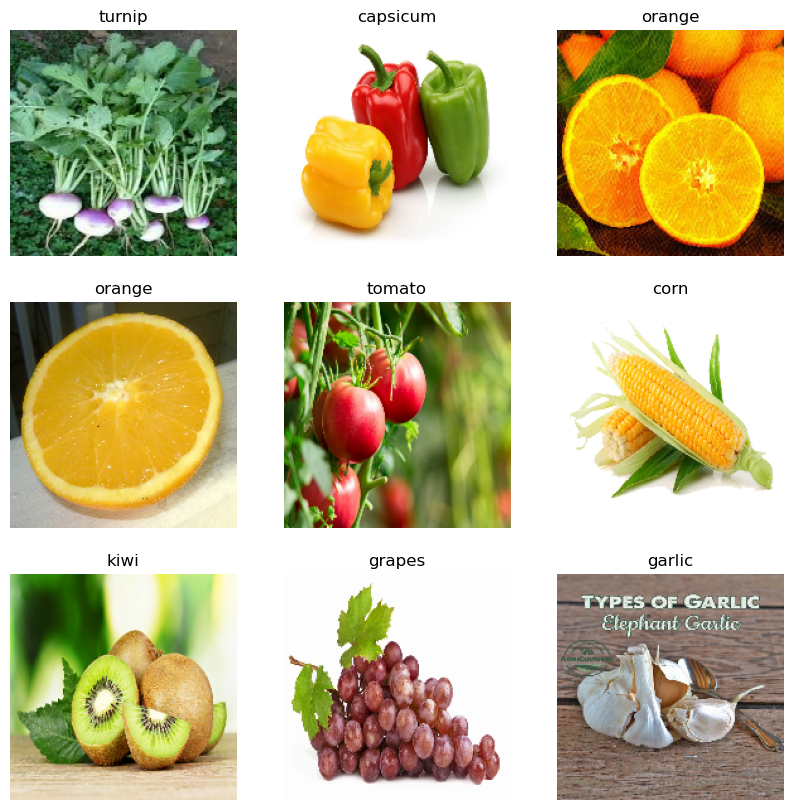

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [3]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [2]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

NameError: name 'Sequential' is not defined

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


98/98 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.0884 - loss: 3.3920 - val_accuracy: 0.4359 - val_loss: 2.1188
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.3224 - loss: 2.3752 - val_accuracy: 0.5385 - val_loss: 1.5775
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.4251 - loss: 1.9803 - val_accuracy: 0.7236 - val_loss: 1.0463
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.5820 - loss: 1.4193 - val_accuracy: 0.8291 - val_loss: 0.5923
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.7538 - loss: 0.8674 - val_accuracy: 0.9088 - val_loss: 0.3498
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8584 - loss: 0.5054 - val_accuracy: 0.9402 - val_loss: 0.2900
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9226 - loss: 0.3436 - val_accuracy: 0.9544 - val_loss: 0.2351
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.9465 - loss: 0.2310 - val_accuracy: 0.9459 - val_loss: 0.

Text(0.5, 1.0, 'Loss')

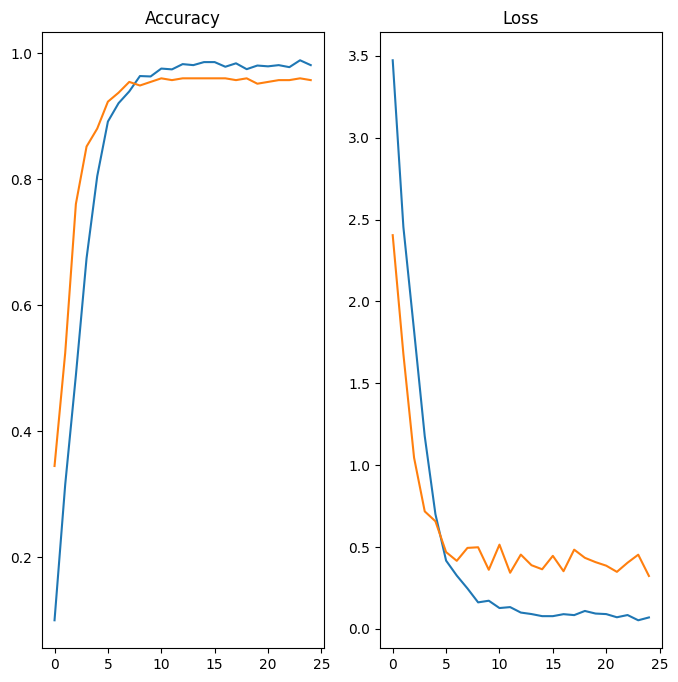

In [36]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [54]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [55]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 19ms/step


In [56]:
score = tf.nn.softmax(predict)

In [57]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 78.90


In [58]:
model.save('Image_classify.keras')